# PROJETO DADOS DO CENSO UCI - PARTE 2

**Objetivo**: A tarefa é prever se renda anual de um indivíduo é superior a $50.000 por ano com base em dados do censo.

**Dataset**: O conjunto de dados para este projeto é originário do [Repositório de Aprendizado de Máquina da UCI](https://archive.ics.uci.edu/ml/datasets/Adult)

**Habilidades Avaliadas em Todo o Projeto**: 
- Manipulação de arquivos .csv
- Limpeza e Tratamento dos dados
- Análise exploratória dos dados
- Técnicas de preprocessamento e transformação dos dados (OneHotEncoder, OrdinalEncoder, StandardScaler, .get_dummies, .qcut)
- Seleção de features
- Ajuste dos hiperparâmetros (GridSearchCV)
- Aplicação de modelos de machine learning para classificação (LogisticRegression, KNeighborsClassifier, RandomForest, DecisionTree, MLPClassifier)
- Métricas de validação (validação cruzada, acurácia, precisão, f1 score, matriz de confusão e relatório de classificação)
- Previsão com a base de teste
- Persistindo o modelo final de machine learning para o disco (joblib)
- Pensamento analítico e conclusão
- Projeção para outros tipos de problemas de negócio

**___________________________________________________________________________________________________________________________**

# DESCRIÇÃO DO DATASET

- **age**: Idade.

- **workclass**: Classe trabalhadora.

- **education**: Níveis de Escolaridade.

- **education-num**: Código do Nível de Escolaridade.

- **marital-status**: Estado Civil.

- **occupation**: Ocupação.

- **relationship**: Relacionamento.

- **race**: Raça.

- **sex**: Sexo.

- **capital-gain**: Ganho de Capital.

- **capital-loss**: Perda de Capital.

- **hours-per-week**: Horas de trabalho por Semana.

- **native-country**: País Nativo.

- **fnlwgt**: "fnlwgt" é uma abreviação de "final weight" (peso final) e refere-se a um valor utilizado em análises estatísticas, especialmente em pesquisas de amostra, como o Censo dos Estados Unidos. Esse peso é aplicado para ajustar a amostra de forma que ela represente adequadamente a população total, levando em conta fatores como a seleção da amostra e a não resposta. Assim, o "fnlwgt" ajuda a garantir que os resultados da pesquisa reflitam com precisão as características demográficas da população.

**___________________________________________________________________________________________________________________________**

# ETAPAS DO PROJETO
- [Importação](#importacao)
- [Análise Exploratória e Tratamento](#tratamento)
- [Modelagem](#modelagem)
- [Avaliação](#avaliacao)
- [Previsão](#previsao)
- [Conclusão](#conclusao)
- [Resumo](#resumo)
- [Exportação](#exportacao)

**___________________________________________________________________________________________________________________________**

<a id='importacao'></a>
# IMPORTAÇÃO

- Vamos importar novamente as bases e replicar todos os tratamentos que foram feitos na parte 1 do projeto

In [1]:
# Importação de algumas bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Ignorando os avisos
import warnings
warnings.filterwarnings('ignore')

- **Base de Treino**

In [2]:
# Importação da base de dados
df_treino = pd.read_csv('dataset/dados_limpos/adult_train.csv')

In [3]:
# Visualizando a base de dados
df_treino.head(2)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K


- **Base de Teste**

In [4]:
# Importação da base de dados
df_teste = pd.read_csv('dataset/dados_limpos/adult_test.csv')

In [5]:
# Visualizando a base de dados
df_teste.head(2)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K


## Fazendo o mesmo tratamento inicial que fizemos na parte 1

- Para isso, utilize o código disponível no capítulo "Resumo" do arquivo chamado "Projeto Censo UCI - Parte 1".

In [6]:
# Removendo os valores duplicados
df_treino = df_treino.drop_duplicates(ignore_index=True)
df_teste = df_teste.drop_duplicates(ignore_index=True)

# Transformando em numérica
df_treino.loc[:, 'income'] = df_treino['income'].map({'>50K': 1, '<=50K': 0})
df_teste.loc[:, 'income'] = df_teste['income'].map({'>50K': 1, '<=50K': 0})

# Convertendo a coluna para o tipo 'int32'
df_treino['income'] = df_treino['income'].astype('int32')
df_teste['income'] = df_teste['income'].astype('int32')

**___________________________________________________________________________________________________________________________**

<a id='tratamento'></a>
# ANÁLISE EXPLORATÓRIA E TRATAMENTO

- [Analisando as Colunas Categóricas](#categoricas)
- [Tratando a Coluna Sex](#sex)
- [Tratando a Coluna Education](#education)
- [Tratando a Coluna hours_per_week](#hours)
- [Tratando a Coluna Age](#age)
- [Tratando as Colunas Relationship e marital_status](#relationship)
- [Tratando a Coluna Workclass](#workclass)
- [Tratando a Coluna Occupation](#occupation)
- [Tratando a Coluna Native_country](#country)
- [Tratando a Coluna Race](#race)
- [Removendo as Colunas](#removendo)

<a id='categoricas'></a>
## Analisando as Colunas Categóricas
- Precisaremos tratar as colunas categóricas abaixo

In [7]:
# Selecionando apenas as colunas categóricas
cat_cols = df_treino.columns[df_treino.dtypes == 'object']
cat_cols

Index(['workclass', 'education', 'marital_status', 'occupation',
       'relationship', 'race', 'sex', 'native_country'],
      dtype='object')

In [8]:
# Visualizando as colunas categóricas
df_treino[cat_cols].head(3)

,workclass,education,marital_status,occupation,relationship,race,sex,native_country
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States


In [9]:
# Analisando a estatística descritiva da base das colunas categóricas
df_treino.describe(include=['O'])

,workclass,education,marital_status,occupation,relationship,race,sex,native_country
count,32537,32537,32537,32537,32537,32537,32537,32537
unique,9,16,7,15,6,5,2,42
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States
freq,22673,10494,14970,4136,13187,27795,21775,29153


<a id='sex'></a>
## Tratando a Coluna Sex
- Vamos iniciar o nosso tratamento pela coluna sex

- **Base de Treino**

Text(0.5, 1.0, 'Renda por Sexo')

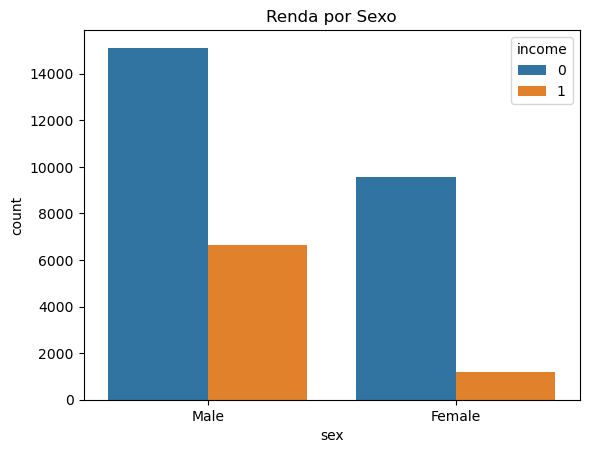

In [10]:
# Visualizando a distribuição da renda por sexo
sns.countplot(data=df_treino, x='sex', hue='income')
plt.title('Renda por Sexo')

In [11]:
# Quantidade homens e mulheres da nossa base de treino
df_treino['sex'].value_counts()

sex
Male      21775
Female    10762
Name: count, dtype: int64

In [12]:
# Transformando em numérico e armazenando na coluna sex
df_treino['sex'] = pd.get_dummies(df_treino['sex'], drop_first=True, dtype='int32')

In [13]:
# Visualizando a coluna sex transformada para numérica
df_treino['sex'].value_counts()

sex
1    21775
0    10762
Name: count, dtype: int64

- Agora a coluna 'sex' foi codificada para numérica:
    - masculino = 1
    - feminino = 0

- **Base de Teste**

In [14]:
# Quantidade por sexo
df_teste['sex'].value_counts()

sex
Male      10856
Female     5420
Name: count, dtype: int64

In [15]:
# Transformando em numérico e armazenando na coluna sex
df_teste['sex'] = pd.get_dummies(df_teste['sex'], drop_first=True, dtype='int32')

<a id='education'></a>
## Tratando a Coluna Education

- **Base de Treino**

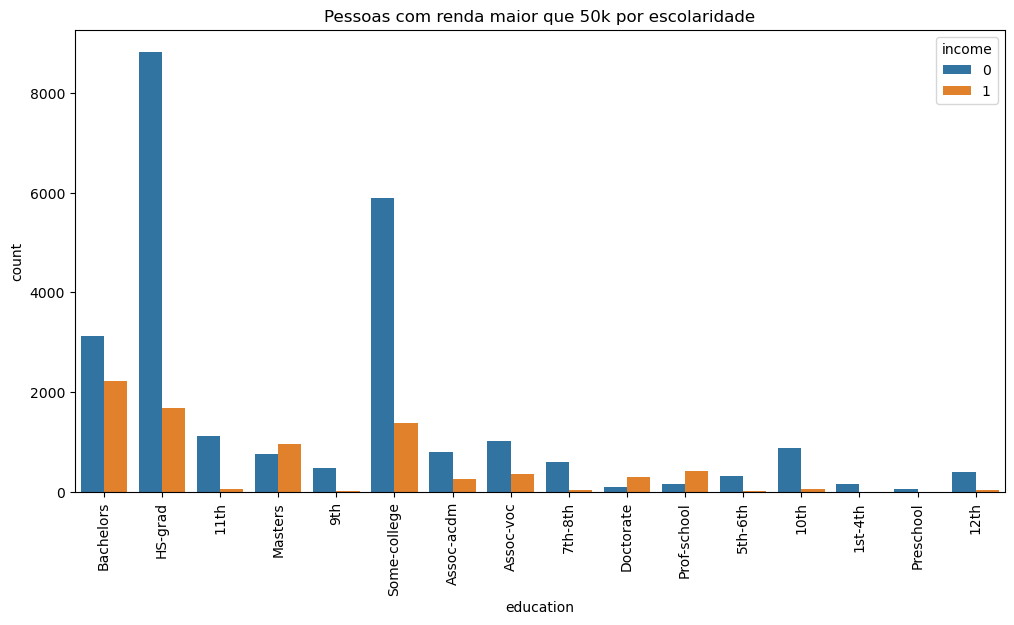

In [16]:
# Visualizando a quantidade de pessoas com renda maior que 50k por escolaridade
plt.figure(figsize=(12, 6))
sns.countplot(data=df_treino, x='education', hue='income')
plt.xticks(rotation=90)
plt.title('Pessoas com renda maior que 50k por escolaridade')
plt.show()

- Observe abaixo que as colunas 'education' e 'education_num' estão relacionadas, ou seja, cada valor em 'education' tem um código numérico correspondente na coluna 'education_num'

In [17]:
# Aqui, estamos agrupando as colunas 'education' e 'education_num', fazendo a contagem, soma e média da coluna 'income'
# por grupo e por fim, colocando a tabela em ordem crescente de acordo com o código numérico da coluna 'education_num'

df_treino.groupby(['education', 'education_num'])['income'].agg(['count', 'sum', 'mean']).sort_values(by='education_num')

,,count,sum,mean
education,education_num,,,
Preschool,1,50,0,0.000000
1st-4th,2,166,6,0.036145
5th-6th,3,332,16,0.048193
7th-8th,4,645,40,0.062016
9th,5,514,27,0.052529
10th,6,933,62,0.066452
11th,7,1175,60,0.051064
12th,8,433,33,0.076212
HS-grad,9,10494,1674,0.159520


- Observe que os níveis mais altos de escolaridade 'Doctorate', 'Pro-school', 'Master' e 'Bachelors' possuem uma média de pessoas com renda superior a 50k maior que os outros nívels de escolaridade.
- O grau de escolaridade é uma variável qualitativa ordinal, ou seja, variáveis que estão associadas a qualidades de um indivíduo e possuem ordenação.
    - Pensando nisso, podemos agrupar os níveis de escolaridade em categorias de acordo com a hierarquia de importância ou complexidade acadêmica.
    - Abaixo, é mostrado como podemos agrupar os níveis onde cada grupo reflete a progressão típica da educação, desde a educação básica até as qualificações mais avançadas.

**1. Educação Infantil e Ensino Fundamental**

    - Preschool
    - 1st-4th
    - 5th-6th
    - 7th-8th
    - 9th
    
**2. Ensino Médio**

    - 10th
    - 11th
    - 12th
    - HS-grad
    
**3. Educação Superior de Nível Técnico**

    - Some-college
    - Assoc-acdm (Associado Acadêmico)
    - Assoc-voc (Associado Vocacional)
    
**4. Bacharelado**

    - Bachelors (Graduação)
    
**5. Mestrado**

    - Masters (Mestrado)
    
**6. Educação Profissional**

    - Prof-school (Escola Profissional)
    
**7. Doutorado**

    - Doctorate (Doutorado)


In [18]:
# Cria uma função para classificar os níveis de escolaridade em categorias maiores
def cat_education(edu):
    if edu in ['Preschool', '1st-4th', '5th-6th', '7th-8th', '9th']:
        return 'school'
    
    elif edu in ['10th', '11th', '12th', 'HS-grad']:
        return 'high-school'
    
    elif edu in ['Some-college', 'Assoc-acdm', 'Assoc-voc']:
        return 'technical-degree'
    
    elif edu == 'Bachelors':
        return 'bachelors'
    
    elif edu == 'Masters':
        return 'masters'
    
    elif edu == 'Prof-school':
        return 'prof-school'
    
    else:
        return 'doctorate'

In [19]:
# Aplica a função criada na coluna 'education' e armazena o retorno da função em uma nova coluna
df_treino['education_cat'] = df_treino['education'].apply(lambda x: cat_education(x))

In [20]:
# Podemos ver como ficou a nova coluna
df_treino[['education', 'education_cat']].head(15)

,education,education_cat
0,Bachelors,bachelors
1,Bachelors,bachelors
2,HS-grad,high-school
3,11th,high-school
4,Bachelors,bachelors
5,Masters,masters
6,9th,school
7,HS-grad,high-school
8,Masters,masters
9,Bachelors,bachelors


In [21]:
# Analisando as rendas por categoria de educação
df_treino.groupby('education_cat')['income'].agg(['count', 'sum', 'mean']).sort_values('mean', ascending=False)

,count,sum,mean
education_cat,,,
doctorate,413,306,0.740920
prof-school,576,423,0.734375
masters,1722,959,0.556911
bachelors,5353,2221,0.414908
technical-degree,9731,2012,0.206762
high-school,13035,1829,0.140315
school,1707,89,0.052138


- Agora, vamos codificar as categorias acima em números de acordo com a hierarquia de importância ou complexidade acadêmica
    - Os níveis de escolaridade mais elevados, receberão valores ou pesos maiores.
- Para isso, vamos utilizar o OrdinalEncoder

In [22]:
# Importa a biblioteca
from sklearn.preprocessing import OrdinalEncoder

In [23]:
# Cria uma instância do OrdinalEncoder
ode_education = OrdinalEncoder(categories=[['school', 'high-school', 'technical-degree', 'bachelors', 'masters', 'prof-school', 'doctorate']], dtype='int32')

In [24]:
# Aplica a transformação e armazena o resultado na coluna 'education_num'
df_treino['education_num'] = ode_education.fit_transform(df_treino[['education_cat']])

In [25]:
# Podemos ver como ficou codificado cada grupo educacional
df_treino.groupby(['education_cat', 'education_num'])['income'].agg(['count', 'sum', 'mean']).sort_values('mean', ascending=False)

,,count,sum,mean
education_cat,education_num,,,
doctorate,6,413,306,0.740920
prof-school,5,576,423,0.734375
masters,4,1722,959,0.556911
bachelors,3,5353,2221,0.414908
technical-degree,2,9731,2012,0.206762
high-school,1,13035,1829,0.140315
school,0,1707,89,0.052138


- Agora podemos remover a coluna 'education' e 'education_cat'.

In [26]:
# Removendo as colunas 'education' e 'education_cat'
df_treino.drop(['education', 'education_cat'], axis=1, inplace=True)

In [27]:
# Visualizando o dataframe após a mudança
df_treino.head(3)

,age,workclass,fnlwgt,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,3,Never-married,Adm-clerical,Not-in-family,White,1,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,3,Married-civ-spouse,Exec-managerial,Husband,White,1,0,0,13,United-States,0
2,38,Private,215646,1,Divorced,Handlers-cleaners,Not-in-family,White,1,0,0,40,United-States,0


- **Base de Teste**
    - Fazendo o mesmo procedimento para a base de teste

In [28]:
# Aplica a função criada na coluna 'education' e armazena o retorno da função em uma nova coluna
df_teste['education_cat'] = df_teste['education'].apply(lambda x: cat_education(x))

In [29]:
# Aplica a transformação e armazena o resultado na coluna 'education_num'
df_teste['education_num'] = ode_education.transform(df_teste[['education_cat']])

In [30]:
# Removendo as colunas 'education' e 'education_cat'
df_teste.drop(['education', 'education_cat'], axis=1, inplace=True)

In [31]:
# Visualizando o dataframe após a mudança
df_teste.head(3)

,age,workclass,fnlwgt,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,25,Private,226802,1,Never-married,Machine-op-inspct,Own-child,Black,1,0,0,40,United-States,0
1,38,Private,89814,1,Married-civ-spouse,Farming-fishing,Husband,White,1,0,0,50,United-States,0
2,28,Local-gov,336951,2,Married-civ-spouse,Protective-serv,Husband,White,1,0,0,40,United-States,1


<a id='hours'></a>
## Tratando a Coluna Hours_per_week

- **Base de Treino**

Text(0.5, 0, 'hours_per_week')

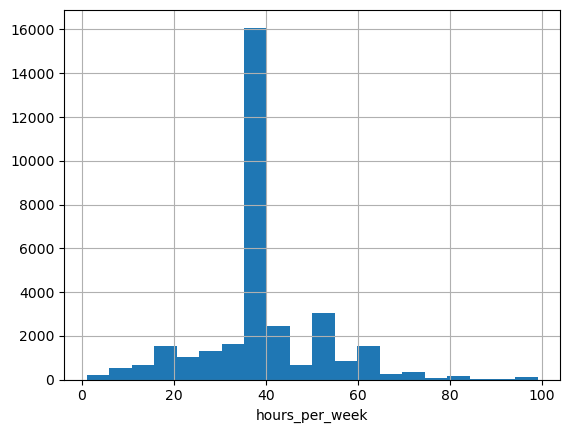

In [32]:
# Gráfico de distribuição das horas
df_treino['hours_per_week'].hist(bins=20)
plt.xlabel('hours_per_week')

In [33]:
# estatística descritiva da coluna 'hours_per_week'
df_treino['hours_per_week'].describe()

count    32537.000000
mean        40.440329
std         12.346889
min          1.000000
25%         40.000000
50%         40.000000
75%         45.000000
max         99.000000
Name: hours_per_week, dtype: float64

In [34]:
# Verificando a média das horas por semana de cada classe da coluna income
df_treino.groupby('income')['hours_per_week'].mean()

income
0    38.842862
1    45.473402
Name: hours_per_week, dtype: float64

- Observe que temos pessoas que trabalharam 99 horas por semana e por outro lado, temos pessoas que trabalharam apenas 1 hora por semana
- Se considerarmos a jornada de trabalho sendo uma média entre 35 a 45 horas semanais, temos os seguintes casos:
    - as pessoas que ultrapassaram esta média fizeram hora extra na semana
    - quem não atingiu esta média, não trabalhou horas suficientes durante a semana

- Vamos analisar melhor este cenário, começando com os dados das pessoas que trabalharam mais que 45 horas por semana

In [35]:
# Selecionando os dados das pessoas com 'hours_per_week' maior que 45 horas
extra_hours = df_treino[df_treino['hours_per_week'] > 45]

In [36]:
# Analisando as informações das horas por semana das pessoas que fizeram hora extra
extra_hours.groupby('income')['hours_per_week'].describe().transpose()

income,0,1
count,4155.000000,2980.000000
mean,56.640915,55.962752
std,10.215189,8.918016
min,46.000000,46.000000
25%,50.000000,50.000000
50%,52.000000,52.000000
75%,60.000000,60.000000
max,99.000000,99.000000


<Axes: xlabel='income', ylabel='count'>

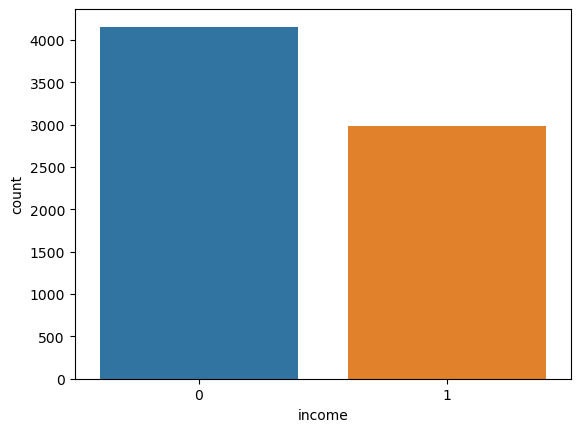

In [37]:
# Visualizando a contagem das classes da coluna income apenas das pessoas que fizeram hora extra
sns.countplot(data=extra_hours, x='income')

- Vamos visualizar os dados das pessoas que trabalharam entre 35 e 45 horas semanais

In [38]:
# Selecionando os dados das pessoas com 'hours_per_week' entre 35 e 45 horas semanais
working_hours = df_treino[(df_treino['hours_per_week'] >=35) & (df_treino['hours_per_week'] <= 45)]

In [39]:
# Analisando as informações das horas por semana das pessoas que fizaram o horário de trabalho médio
working_hours.groupby('income')['hours_per_week'].describe().transpose()

income,0,1
count,15352.000000,4472.000000
mean,39.967040,40.581172
std,2.063788,2.294106
min,35.000000,35.000000
25%,40.000000,40.000000
50%,40.000000,40.000000
75%,40.000000,40.000000
max,45.000000,45.000000


<Axes: xlabel='income', ylabel='count'>

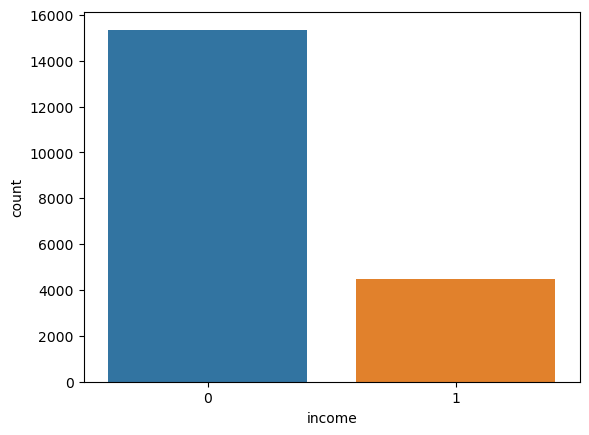

In [40]:
# Visualizando a contagem das classes da coluna income
sns.countplot(data=working_hours, x='income')

- Vamos visualizar os dados das pessoas que trabalharam menos que 35 horas semanais

In [41]:
# Selecionando os dados das pessoas com 'hours_per_week' menor que 35 horas
less_working_hours = df_treino[df_treino['hours_per_week'] < 35]

In [42]:
# Analisando as informações das horas por semana das pessoas que trabalharam menos
less_working_hours.groupby('income')['hours_per_week'].describe().transpose()

income,0,1
count,5191.000000,387.000000
mean,21.272202,21.235142
std,7.734546,8.534842
min,1.000000,1.000000
25%,16.000000,16.000000
50%,20.000000,20.000000
75%,30.000000,30.000000
max,34.000000,34.000000


<Axes: xlabel='income', ylabel='count'>

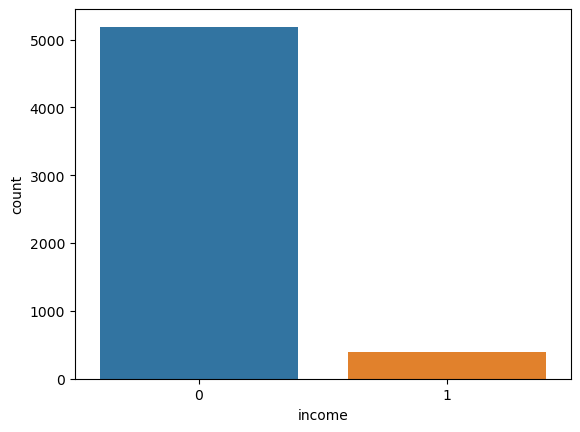

In [43]:
# Visualizando a contagem das classes da coluna income
sns.countplot(data=less_working_hours, x='income')

- Agora, vamos classificar as horas por semana de acordo com o que vimos acima

In [44]:
# Cria uma função de classificação
def classifica_hours(hours):
    if hours > 45: # Se horas extras trabalhadas
        return 2
    elif hours >= 35  and hours <= 45: # Se horas padrão trabalhadas
        return 1
    else: # Se menos horas trabalhadas
        return 0

In [45]:
# Aplica a função na coluna 'hours_per_week' e armazena o retorno da função em uma nova coluna
df_treino['hours_check'] = df_treino['hours_per_week'].apply(classifica_hours)

In [46]:
# Analisando a quantidade de pessoas com renda maior que 50k por horas trabalhadas
df_treino.groupby('hours_check')['income'].agg(['count', 'sum', 'mean']).sort_values(by='mean', ascending=False)

,count,sum,mean
hours_check,,,
2,7135,2980,0.417659
1,19824,4472,0.225585
0,5578,387,0.069380


- Agora podemos remover a coluna 'hours_per_week'.

In [47]:
# Removendo a coluna 'hours_per_week'
df_treino.drop('hours_per_week', axis=1, inplace=True)

In [48]:
# Visualizando o dataframe após a mudança
df_treino.head(3)

,age,workclass,fnlwgt,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,native_country,income,hours_check
0,39,State-gov,77516,3,Never-married,Adm-clerical,Not-in-family,White,1,2174,0,United-States,0,1
1,50,Self-emp-not-inc,83311,3,Married-civ-spouse,Exec-managerial,Husband,White,1,0,0,United-States,0,0
2,38,Private,215646,1,Divorced,Handlers-cleaners,Not-in-family,White,1,0,0,United-States,0,1


- **Base de Teste**

In [49]:
# Aplica a função na coluna 'hours_per_week' e armazena o retorno da função em uma nova coluna
df_teste['hours_check'] = df_teste['hours_per_week'].apply(classifica_hours)

In [50]:
# Removendo a coluna 'hours_per_week'
df_teste.drop('hours_per_week', axis=1, inplace=True)

In [51]:
# Visualizando o dataframe após a mudança
df_teste.head(3)

,age,workclass,fnlwgt,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,native_country,income,hours_check
0,25,Private,226802,1,Never-married,Machine-op-inspct,Own-child,Black,1,0,0,United-States,0,1
1,38,Private,89814,1,Married-civ-spouse,Farming-fishing,Husband,White,1,0,0,United-States,0,2
2,28,Local-gov,336951,2,Married-civ-spouse,Protective-serv,Husband,White,1,0,0,United-States,1,1


<a id='age'></a>
## Tratando a Coluna Age

- **Base de Treino**

<Axes: xlabel='age', ylabel='Count'>

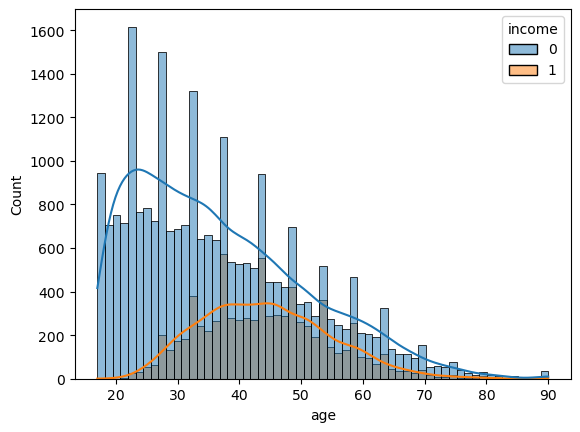

In [52]:
# Visualizando a distribuição das idades de acordo com renda
sns.histplot(data=df_treino, x='age', hue='income', kde=True)

- Vamos fazer uma análise mais detalhada das idades de acordo com a coluna income

In [53]:
# Estatística descritiva da coluna Age por renda
df_treino_age = df_treino.groupby('income')[['age']].describe().transpose()
df_treino_age

income                0            1
age count  24698.000000  7839.000000
    mean      36.787392    44.250925
    std       14.017335    10.520102
    min       17.000000    19.000000
    25%       25.000000    36.000000
    50%       34.000000    44.000000
    75%       46.000000    51.000000
    max       90.000000    90.000000

- Podemos classificar as idades da seguinte forma:
    - Adolecente: <= 21 anos
    - Adulto: 22 ~ 60 anos
    - Idoso: > 60 anos

In [54]:
# Função que classifica as idades
def classifica_idade(idade):
    if idade <= 21: # Adolecente
        return 0
    elif idade > 21 and idade <= 60: # Adulto
        return 1
    else: # Idoso
        return 2

In [55]:
# Aplica a função na coluna 'age' e armazena o retorno da função em uma nova coluna
df_treino['age_check'] = df_treino['age'].apply(classifica_idade)

In [56]:
# Agrupando por idade e fazendo uma contagem das classes da coluna income
df_treino.groupby('age_check')['income'].agg(['count', 'sum', 'mean']).sort_values(by='mean', ascending=False)

,count,sum,mean
age_check,,,
1,27083,7283,0.268914
2,2331,551,0.236379
0,3123,5,0.001601


- Agora podemos remover a coluna 'age'.

In [57]:
# Removendo a coluna 'age'
df_treino.drop('age', axis=1, inplace=True)

In [58]:
# Visualizando o dataframe após a mudança
df_treino.head(3)

,workclass,fnlwgt,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,native_country,income,hours_check,age_check
0,State-gov,77516,3,Never-married,Adm-clerical,Not-in-family,White,1,2174,0,United-States,0,1,1
1,Self-emp-not-inc,83311,3,Married-civ-spouse,Exec-managerial,Husband,White,1,0,0,United-States,0,0,1
2,Private,215646,1,Divorced,Handlers-cleaners,Not-in-family,White,1,0,0,United-States,0,1,1


- **Base de Teste**

In [59]:
# Aplica a função na coluna 'age' e armazena o retorno da função em uma nova coluna
df_teste['age_check'] = df_teste['age'].apply(classifica_idade)

In [60]:
# Removendo a coluna 'age'
df_teste.drop('age', axis=1, inplace=True)

In [61]:
# Visualizando o dataframe após a mudança
df_teste.head(3)

,workclass,fnlwgt,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,native_country,income,hours_check,age_check
0,Private,226802,1,Never-married,Machine-op-inspct,Own-child,Black,1,0,0,United-States,0,1,1
1,Private,89814,1,Married-civ-spouse,Farming-fishing,Husband,White,1,0,0,United-States,0,2,1
2,Local-gov,336951,2,Married-civ-spouse,Protective-serv,Husband,White,1,0,0,United-States,1,1,1


<a id='relationship'></a>
## Tratando as Colunas Relationship e Marital_status

- **Base de Treino**

<Axes: xlabel='relationship', ylabel='count'>

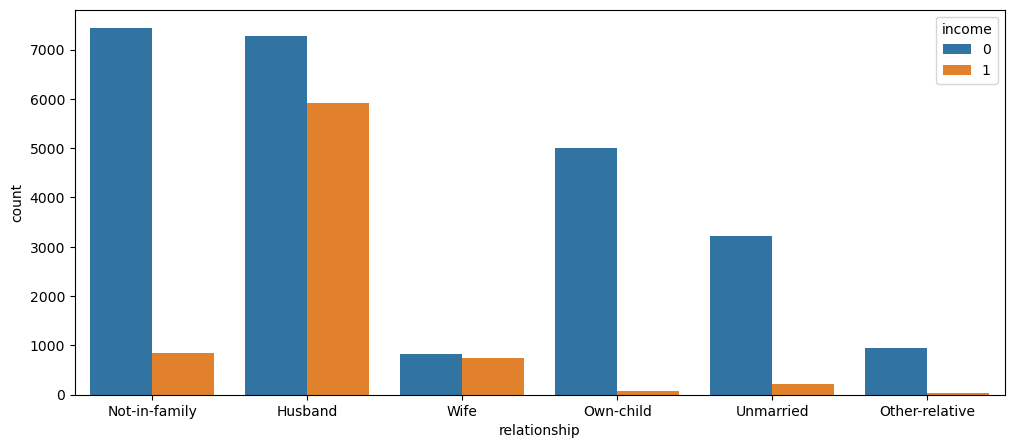

In [62]:
# Visualizando a distribuição da renda por relacionamento
plt.figure(figsize=(12, 5))
sns.countplot(data=df_treino, x='relationship', hue='income')

In [63]:
# Análise mais detalhada da renda por relacionamento
df_treino.groupby('relationship')['income'].agg(['count', 'sum', 'mean']).sort_values(by='mean', ascending=False)

,count,sum,mean
relationship,,,
Wife,1568,745,0.475128
Husband,13187,5916,0.448624
Not-in-family,8292,856,0.103232
Unmarried,3445,218,0.063280
Other-relative,981,37,0.037717
Own-child,5064,67,0.013231


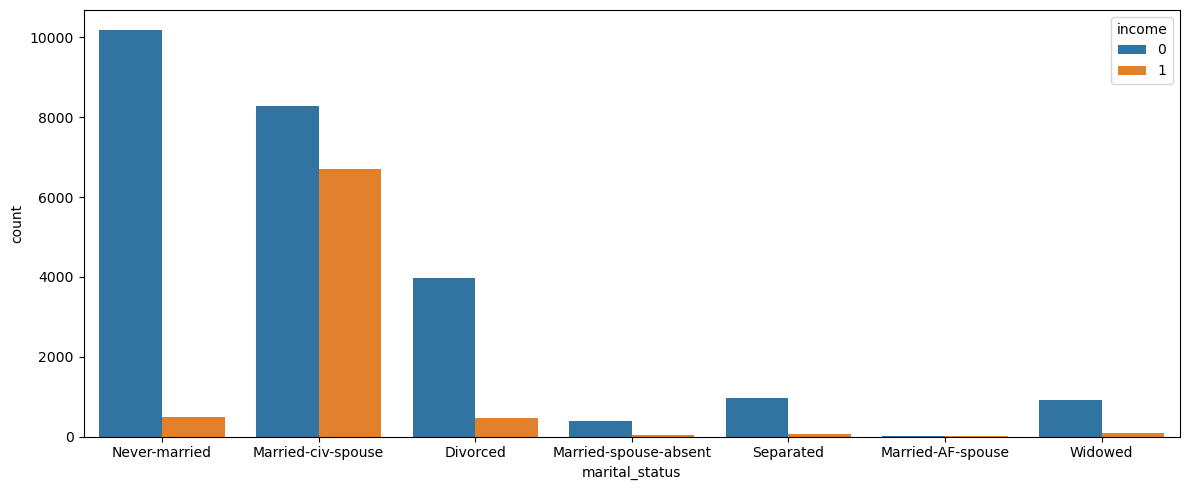

In [64]:
# Visualizando a distribuição da renda por status-civil
plt.figure(figsize=(12, 5))
sns.countplot(data=df_treino, x='marital_status', hue='income')
plt.tight_layout()

In [65]:
# Análise mais detalhada da renda por status-civil
df_treino.groupby('marital_status')['income'].agg(['count', 'sum', 'mean']).sort_values(by='mean', ascending=False)

,count,sum,mean
marital_status,,,
Married-civ-spouse,14970,6690,0.446894
Married-AF-spouse,23,10,0.434783
Divorced,4441,463,0.104256
Widowed,993,85,0.085599
Married-spouse-absent,418,34,0.081340
Separated,1025,66,0.064390
Never-married,10667,491,0.046030


In [66]:
# Tabela de contingência que mostra a frequência de combinações de valores entre as colunas marital_status e relationship
pd.crosstab(df_treino['marital_status'], df_treino['relationship'])

relationship,Husband,Not-in-family,Other-relative,Own-child,Unmarried,Wife
marital_status,,,,,,
Divorced,0,2403,110,328,1600,0
Married-AF-spouse,9,0,1,1,0,12
Married-civ-spouse,13178,17,124,95,0,1556
Married-spouse-absent,0,211,32,45,130,0
Never-married,0,4694,611,4481,881,0
Separated,0,420,55,99,451,0
Widowed,0,547,48,15,383,0


- Observe que os valores 'Husband' e 'Wife' da coluna 'relationship' possuem mais pessoas com renda superior a 50k
- Podemos dizer o mesmo para os valores 'Married-civ-spouse' e 'Married-AF-spouse' da coluna 'marital_status'.
    - Com isso, podemos assumir que a média das pessoas com renda maior que 50k é maior se a pessoa é casada e tem um parceiro presente, podemos pensar que duas pessoas que dividem as despesas e compartilham os ganhos tendem a ter uma renda maior que 50k.
    - Dessa forma, vamos apenas criar uma coluna para indicar se a pessoa é casada ou nao

In [67]:
# Classifica se a pessoa é casada ou não e armazena a resposta em uma nova coluna
df_treino['married_check'] = df_treino['marital_status'].apply(lambda x: 1 if x in ['Married-civ-spouse', 'Married-AF-spouse'] else 0)

In [68]:
# Visualizando se nossa alteração está correta
df_treino[['marital_status', 'married_check']].value_counts()

marital_status         married_check
Married-civ-spouse     1                14970
Never-married          0                10667
Divorced               0                 4441
Separated              0                 1025
Widowed                0                  993
Married-spouse-absent  0                  418
Married-AF-spouse      1                   23
Name: count, dtype: int64

- Observe que o valor 'Married-spouse-absent' não foi considerado pois estamos apenas interessados nas pessoas que são casadas e possuem um parceiro presente.

<Axes: xlabel='married_check', ylabel='count'>

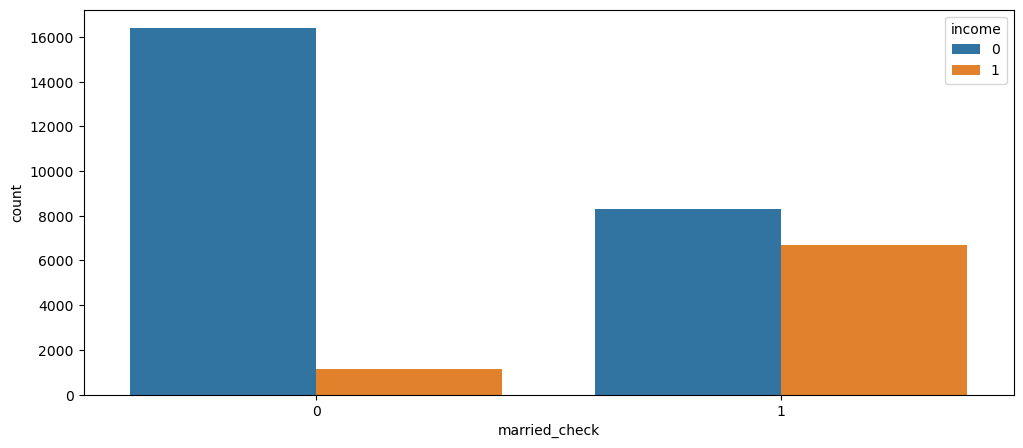

In [69]:
# Visualizando a distribuição da renda por pessoas casadas
plt.figure(figsize=(12, 5))
sns.countplot(data=df_treino, x='married_check', hue='income')

In [70]:
# Análise mais detalhada da renda por pessoas casadas
df_treino.groupby('married_check')['income'].agg(['count', 'sum', 'mean']).sort_values(by='mean', ascending=False)

,count,sum,mean
married_check,,,
1,14993,6700,0.446875
0,17544,1139,0.064922


- Agora podemos remover as colunas 'marital_status' e 'relationship'

In [71]:
# Podemos agora eliminar as colunas 'marital_status' e 'relationship'
df_treino.drop(['marital_status', 'relationship'], axis=1, inplace=True)

In [72]:
# Visualizar o nosso dataframe
df_treino.head(3)

,workclass,fnlwgt,education_num,occupation,race,sex,capital_gain,capital_loss,native_country,income,hours_check,age_check,married_check
0,State-gov,77516,3,Adm-clerical,White,1,2174,0,United-States,0,1,1,0
1,Self-emp-not-inc,83311,3,Exec-managerial,White,1,0,0,United-States,0,0,1,1
2,Private,215646,1,Handlers-cleaners,White,1,0,0,United-States,0,1,1,0


- **Base de Teste**

In [73]:
# Classifica se a pessoa é casada ou não e armazena a resposta em uma nova coluna
df_teste['married_check'] = df_teste['marital_status'].apply(lambda x: 1 if x in ['Married-civ-spouse', 'Married-AF-spouse'] else 0)

In [74]:
# Podemos agora eliminar as colunas 'marital_status' e 'relationship'
df_teste.drop(['marital_status', 'relationship'], axis=1, inplace=True)

In [75]:
# Visualizar o nosso dataframe
df_teste.head(3)

,workclass,fnlwgt,education_num,occupation,race,sex,capital_gain,capital_loss,native_country,income,hours_check,age_check,married_check
0,Private,226802,1,Machine-op-inspct,Black,1,0,0,United-States,0,1,1,0
1,Private,89814,1,Farming-fishing,White,1,0,0,United-States,0,2,1,1
2,Local-gov,336951,2,Protective-serv,White,1,0,0,United-States,1,1,1,1


<a id='workclass'></a>
## Tratando a Coluna Workclass

- **Base Treino**

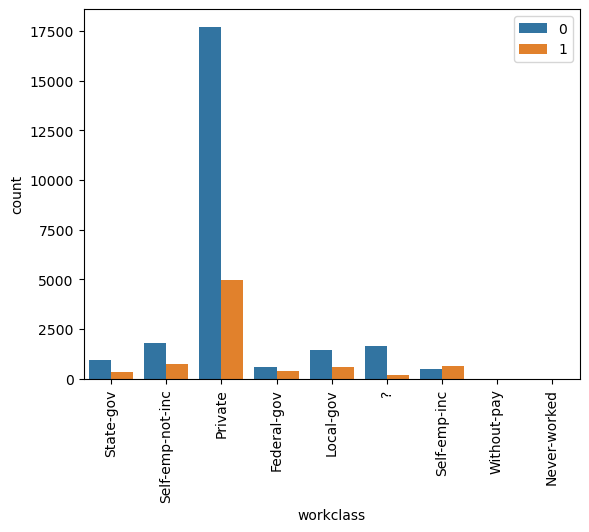

In [76]:
# Visualizando a renda por classe trabalhadora
sns.countplot(data=df_treino, x='workclass', hue='income')
plt.xticks(rotation=90)
plt.legend(loc=0)

In [77]:
# Analisando com mais detalhes a renda por classe trabalhadora
df_treino.groupby(['workclass'])['income'].agg(['count', 'sum', 'mean']).sort_values('mean', ascending=False)

,count,sum,mean
workclass,,,
Self-emp-inc,1116,622,0.557348
Federal-gov,960,371,0.386458
Local-gov,2093,617,0.294792
Self-emp-not-inc,2540,724,0.285039
State-gov,1298,353,0.271957
Private,22673,4961,0.218807
?,1836,191,0.104031
Never-worked,7,0,0.000000
Without-pay,14,0,0.000000


- Perceba que temos pessoas que são autônomos, empresários, funcionario publicos e que não trabalham ou não tem pagamento
- Vamos classificar nossos valores em quatro classes

In [78]:
# Cria uma função que classifica os valores da coluna 'workclass'
def classifica_workclass(work):
    if 'Self-emp' in work: # se autonomo
        return 3
    elif 'gov' in work: # se governo
        return 2
    elif 'Private' in work: # se privado
        return 1
    else: # se nenhuma das opções
        return 0

In [79]:
# Aplica a função na coluna 'workclass'
df_treino['workclass_check'] = df_treino['workclass'].apply(classifica_workclass)

In [80]:
# Analisando com mais detalhes a renda por classe trabalhadora
df_treino.groupby('workclass_check')['income'].agg(['count', 'sum', 'mean']).sort_values(by='mean', ascending=False)

,count,sum,mean
workclass_check,,,
3,3656,1346,0.368162
2,4351,1341,0.308205
1,22673,4961,0.218807
0,1857,191,0.102854


- Agora podemos remover a coluna 'workclass'.

In [81]:
# Agora podemos remover a coluna 'workclass'
df_treino.drop('workclass', axis=1, inplace=True)

In [82]:
# Visualizando o dataframe
df_treino.head(3)

,fnlwgt,education_num,occupation,race,sex,capital_gain,capital_loss,native_country,income,hours_check,age_check,married_check,workclass_check
0,77516,3,Adm-clerical,White,1,2174,0,United-States,0,1,1,0,2
1,83311,3,Exec-managerial,White,1,0,0,United-States,0,0,1,1,3
2,215646,1,Handlers-cleaners,White,1,0,0,United-States,0,1,1,0,1


- **Base Teste**

In [83]:
# Aplica a função na coluna 'workclass'
df_teste['workclass_check'] = df_teste['workclass'].apply(classifica_workclass)

In [84]:
# Agora podemos remover a coluna 'workclass'
df_teste.drop('workclass', axis=1, inplace=True)

In [85]:
# Visualizando o dataframe
df_teste.head(3)

,fnlwgt,education_num,occupation,race,sex,capital_gain,capital_loss,native_country,income,hours_check,age_check,married_check,workclass_check
0,226802,1,Machine-op-inspct,Black,1,0,0,United-States,0,1,1,0,1
1,89814,1,Farming-fishing,White,1,0,0,United-States,0,2,1,1,1
2,336951,2,Protective-serv,White,1,0,0,United-States,1,1,1,1,2


<a id='occupation'></a>
## Tratando a Coluna Occupation

- **Base de Treino**

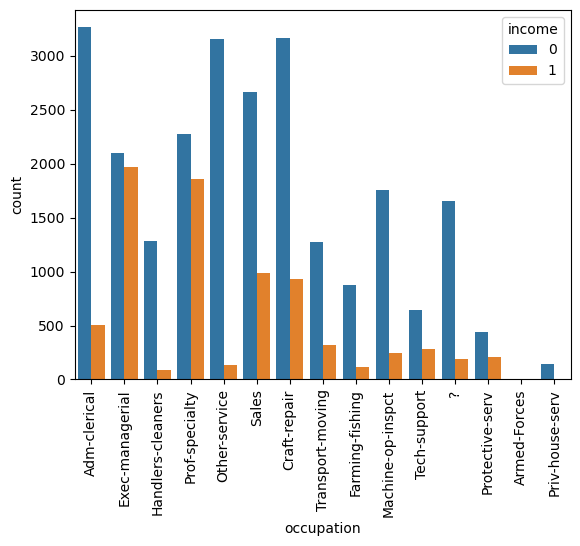

In [86]:
# Visualizando a renda por ocupação
sns.countplot(data=df_treino, x='occupation', hue='income')
plt.xticks(rotation=90)
plt.show()

In [87]:
# Analisando com mais detalhes a renda por ocupação
df_treino.groupby('occupation')['income'].agg(['count', 'sum', 'mean']).sort_values('mean', ascending=False)

,count,sum,mean
occupation,,,
Exec-managerial,4065,1968,0.484133
Prof-specialty,4136,1858,0.449226
Protective-serv,649,211,0.325116
Tech-support,927,283,0.305286
Sales,3650,983,0.269315
Craft-repair,4094,929,0.226917
Transport-moving,1597,320,0.200376
Adm-clerical,3768,507,0.134554
Machine-op-inspct,2000,249,0.124500


- Vamos classificar os trabalhos em quatro classes, para isso vamos utilizar o qcut

In [88]:
# Classificando os trabalhos de acordo com a média de pessoas com renda maior que 50k
labels_occupation = pd.qcut(df_treino.groupby('occupation')['income'].mean(), 4, labels=[0, 1, 2, 3]).sort_values(ascending=False)
labels_occupation

occupation
Exec-managerial      3
Prof-specialty       3
Protective-serv      3
Tech-support         3
Craft-repair         2
Sales                2
Transport-moving     2
Adm-clerical         1
Armed-Forces         1
Farming-fishing      1
Machine-op-inspct    1
?                    0
Handlers-cleaners    0
Other-service        0
Priv-house-serv      0
Name: income, dtype: category
Categories (4, int64): [0 < 1 < 2 < 3]

In [89]:
# Inserindo no dataframe a codificação de cada trabalho e armazenando na coluna 'occupation_check'
df_treino['occupation_check'] = df_treino['occupation'].apply(lambda x: labels_occupation[x])

In [90]:
# Nesta tabela conseguimos ver que nossa alteração esta correta
df_treino.groupby(['occupation', 'occupation_check'])['income'].agg(['count', 'sum', 'mean']).sort_values('mean', ascending=False)

,,count,sum,mean
occupation,occupation_check,,,
Exec-managerial,3,4065,1968,0.484133
Prof-specialty,3,4136,1858,0.449226
Protective-serv,3,649,211,0.325116
Tech-support,3,927,283,0.305286
Sales,2,3650,983,0.269315
Craft-repair,2,4094,929,0.226917
Transport-moving,2,1597,320,0.200376
Adm-clerical,1,3768,507,0.134554
Machine-op-inspct,1,2000,249,0.124500


In [91]:
# Analisando novamente a renda por ocupação
df_treino.groupby('occupation_check')['income'].agg(['count', 'sum', 'mean']).sort_values('mean', ascending=False)

,count,sum,mean
occupation_check,,,
3,9777,4320,0.441853
2,9341,2232,0.238947
1,6769,872,0.128823
0,6650,415,0.062406


- Agora podemos remover a coluna 'occupation'.

In [92]:
# Removendo a coluna 'occupation'
df_treino.drop(['occupation'], axis=1, inplace=True)

In [93]:
# Visualizando o dataframe
df_treino.head(3)

,fnlwgt,education_num,race,sex,capital_gain,capital_loss,native_country,income,hours_check,age_check,married_check,workclass_check,occupation_check
0,77516,3,White,1,2174,0,United-States,0,1,1,0,2,1
1,83311,3,White,1,0,0,United-States,0,0,1,1,3,3
2,215646,1,White,1,0,0,United-States,0,1,1,0,1,0


- **Base de Teste**

In [94]:
# Inserindo no dataframe a codificação de cada trabalho e armazenando na coluna 'occupation_check'
df_teste['occupation_check'] = df_teste['occupation'].apply(lambda x: labels_occupation[x])

In [95]:
# Removendo a coluna 'occupation'
df_teste.drop(['occupation'], axis=1, inplace=True)

In [96]:
# Visualizando o dataframe
df_teste.head(3)

,fnlwgt,education_num,race,sex,capital_gain,capital_loss,native_country,income,hours_check,age_check,married_check,workclass_check,occupation_check
0,226802,1,Black,1,0,0,United-States,0,1,1,0,1,1
1,89814,1,White,1,0,0,United-States,0,2,1,1,1,1
2,336951,2,White,1,0,0,United-States,1,1,1,1,2,3


<a id='country'></a>
## Tratando a Coluna Native_country
- Para a coluna 'native_country' iremos assumir que os países não possuem ordem de importância e por isso utilizaremos o OneHotEncoder para criar uma coluna para cada categoria e atribuir valores de 0 ou 1 conforme apropriado.

- **Base de Treino**

In [97]:
# Importando a biblioteca
from sklearn.preprocessing import OneHotEncoder

In [98]:
# Instanciando o OneHotEncoder
ohe = OneHotEncoder(sparse_output = False, dtype='int32')

In [99]:
# Fazendo o fit_transform na coluna native_country e transformando os dados em um dataframe
df_country = pd.DataFrame(ohe.fit_transform(df_treino[['native_country']]), columns=ohe.get_feature_names_out())
df_country.head()

,native_country_?,native_country_Cambodia,native_country_Canada,native_country_China,native_country_Columbia,native_country_Cuba,native_country_Dominican-Republic,native_country_Ecuador,native_country_El-Salvador,native_country_England,...,native_country_Portugal,native_country_Puerto-Rico,native_country_Scotland,native_country_South,native_country_Taiwan,native_country_Thailand,native_country_Trinadad&Tobago,native_country_United-States,native_country_Vietnam,native_country_Yugoslavia
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [100]:
# Concatenando o dataframe acima com a nossa base de treino
df_treino = pd.concat([df_treino, df_country], axis=1)

In [101]:
# Visualizando a base
df_treino.head()

,fnlwgt,education_num,race,sex,capital_gain,capital_loss,native_country,income,hours_check,age_check,...,native_country_Portugal,native_country_Puerto-Rico,native_country_Scotland,native_country_South,native_country_Taiwan,native_country_Thailand,native_country_Trinadad&Tobago,native_country_United-States,native_country_Vietnam,native_country_Yugoslavia
0,77516,3,White,1,2174,0,United-States,0,1,1,...,0,0,0,0,0,0,0,1,0,0
1,83311,3,White,1,0,0,United-States,0,0,1,...,0,0,0,0,0,0,0,1,0,0
2,215646,1,White,1,0,0,United-States,0,1,1,...,0,0,0,0,0,0,0,1,0,0
3,234721,1,Black,1,0,0,United-States,0,1,1,...,0,0,0,0,0,0,0,1,0,0
4,338409,3,Black,0,0,0,Cuba,0,1,1,...,0,0,0,0,0,0,0,0,0,0


- **Base de Teste**

In [102]:
# Fazendo o transform na coluna native_country e transformando os dados em um dataframe
df_country = pd.DataFrame(ohe.transform(df_teste[['native_country']]), columns=ohe.get_feature_names_out())
df_country.head()

,native_country_?,native_country_Cambodia,native_country_Canada,native_country_China,native_country_Columbia,native_country_Cuba,native_country_Dominican-Republic,native_country_Ecuador,native_country_El-Salvador,native_country_England,...,native_country_Portugal,native_country_Puerto-Rico,native_country_Scotland,native_country_South,native_country_Taiwan,native_country_Thailand,native_country_Trinadad&Tobago,native_country_United-States,native_country_Vietnam,native_country_Yugoslavia
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [103]:
# Concatenando o dataframe acima com a nossa base de teste
df_teste = pd.concat([df_teste, df_country], axis=1)

In [104]:
# Visualizando a base
df_teste.head()

,fnlwgt,education_num,race,sex,capital_gain,capital_loss,native_country,income,hours_check,age_check,...,native_country_Portugal,native_country_Puerto-Rico,native_country_Scotland,native_country_South,native_country_Taiwan,native_country_Thailand,native_country_Trinadad&Tobago,native_country_United-States,native_country_Vietnam,native_country_Yugoslavia
0,226802,1,Black,1,0,0,United-States,0,1,1,...,0,0,0,0,0,0,0,1,0,0
1,89814,1,White,1,0,0,United-States,0,2,1,...,0,0,0,0,0,0,0,1,0,0
2,336951,2,White,1,0,0,United-States,1,1,1,...,0,0,0,0,0,0,0,1,0,0
3,160323,2,Black,1,7688,0,United-States,1,1,1,...,0,0,0,0,0,0,0,1,0,0
4,103497,2,White,0,0,0,United-States,0,0,0,...,0,0,0,0,0,0,0,1,0,0


<a id='race'></a>
## Tratando a Coluna Race
- Na coluna 'race' iremos utilizar a mesma abordagem da coluna 'native_country'.

- **Base de Treino**

In [105]:
# Instanciando o OneHotEncoder
ohe = OneHotEncoder(sparse_output = False, dtype='int32')

In [106]:
# Fazendo o fit_transform na coluna race e transformando os dados em um dataframe
df_race = pd.DataFrame(ohe.fit_transform(df_treino[['race']]), columns=ohe.get_feature_names_out())
df_race.head()

,race_Amer-Indian-Eskimo,race_Asian-Pac-Islander,race_Black,race_Other,race_White
0,0,0,0,0,1
1,0,0,0,0,1
2,0,0,0,0,1
3,0,0,1,0,0
4,0,0,1,0,0


In [107]:
# Concatenando o dataframe acima com a nossa base de treino
df_treino = pd.concat([df_treino, df_race], axis=1)

In [108]:
# Visualizando a base
df_treino.head()

,fnlwgt,education_num,race,sex,capital_gain,capital_loss,native_country,income,hours_check,age_check,...,native_country_Thailand,native_country_Trinadad&Tobago,native_country_United-States,native_country_Vietnam,native_country_Yugoslavia,race_Amer-Indian-Eskimo,race_Asian-Pac-Islander,race_Black,race_Other,race_White
0,77516,3,White,1,2174,0,United-States,0,1,1,...,0,0,1,0,0,0,0,0,0,1
1,83311,3,White,1,0,0,United-States,0,0,1,...,0,0,1,0,0,0,0,0,0,1
2,215646,1,White,1,0,0,United-States,0,1,1,...,0,0,1,0,0,0,0,0,0,1
3,234721,1,Black,1,0,0,United-States,0,1,1,...,0,0,1,0,0,0,0,1,0,0
4,338409,3,Black,0,0,0,Cuba,0,1,1,...,0,0,0,0,0,0,0,1,0,0


- **Base de Teste**

In [109]:
# Fazendo o transform na coluna race e transformando os dados em um dataframe
df_race = pd.DataFrame(ohe.transform(df_teste[['race']]), columns=ohe.get_feature_names_out())
df_race.head()

,race_Amer-Indian-Eskimo,race_Asian-Pac-Islander,race_Black,race_Other,race_White
0,0,0,1,0,0
1,0,0,0,0,1
2,0,0,0,0,1
3,0,0,1,0,0
4,0,0,0,0,1


In [110]:
# Concatenando o dataframe acima com a nossa base de teste
df_teste = pd.concat([df_teste, df_race], axis=1)

In [111]:
# Visualizando a base
df_teste.head()

,fnlwgt,education_num,race,sex,capital_gain,capital_loss,native_country,income,hours_check,age_check,...,native_country_Thailand,native_country_Trinadad&Tobago,native_country_United-States,native_country_Vietnam,native_country_Yugoslavia,race_Amer-Indian-Eskimo,race_Asian-Pac-Islander,race_Black,race_Other,race_White
0,226802,1,Black,1,0,0,United-States,0,1,1,...,0,0,1,0,0,0,0,1,0,0
1,89814,1,White,1,0,0,United-States,0,2,1,...,0,0,1,0,0,0,0,0,0,1
2,336951,2,White,1,0,0,United-States,1,1,1,...,0,0,1,0,0,0,0,0,0,1
3,160323,2,Black,1,7688,0,United-States,1,1,1,...,0,0,1,0,0,0,0,1,0,0
4,103497,2,White,0,0,0,United-States,0,0,0,...,0,0,1,0,0,0,0,0,0,1


<a id='removendo'></a>
## Removendo as Colunas

In [112]:
# Removendo as colunas da base de treino
df_treino.drop(['fnlwgt', 'native_country', 'race'], axis=1, inplace=True)

# Removendo as colunas da base de teste
df_teste.drop(['fnlwgt', 'native_country', 'race'], axis=1, inplace=True)

## Base Final

- **Base de Treino**

In [113]:
# Base final após todos os tratamentos feitos
df_treino.head()

,education_num,sex,capital_gain,capital_loss,income,hours_check,age_check,married_check,workclass_check,occupation_check,...,native_country_Thailand,native_country_Trinadad&Tobago,native_country_United-States,native_country_Vietnam,native_country_Yugoslavia,race_Amer-Indian-Eskimo,race_Asian-Pac-Islander,race_Black,race_Other,race_White
0,3,1,2174,0,0,1,1,0,2,1,...,0,0,1,0,0,0,0,0,0,1
1,3,1,0,0,0,0,1,1,3,3,...,0,0,1,0,0,0,0,0,0,1
2,1,1,0,0,0,1,1,0,1,0,...,0,0,1,0,0,0,0,0,0,1
3,1,1,0,0,0,1,1,1,1,0,...,0,0,1,0,0,0,0,1,0,0
4,3,0,0,0,0,1,1,1,1,3,...,0,0,0,0,0,0,0,1,0,0


- **Base de Teste**

In [114]:
# Base final após todos os tratamentos feitos
df_teste.head()

,education_num,sex,capital_gain,capital_loss,income,hours_check,age_check,married_check,workclass_check,occupation_check,...,native_country_Thailand,native_country_Trinadad&Tobago,native_country_United-States,native_country_Vietnam,native_country_Yugoslavia,race_Amer-Indian-Eskimo,race_Asian-Pac-Islander,race_Black,race_Other,race_White
0,1,1,0,0,0,1,1,0,1,1,...,0,0,1,0,0,0,0,1,0,0
1,1,1,0,0,0,2,1,1,1,1,...,0,0,1,0,0,0,0,0,0,1
2,2,1,0,0,1,1,1,1,2,3,...,0,0,1,0,0,0,0,0,0,1
3,2,1,7688,0,1,1,1,1,1,1,...,0,0,1,0,0,0,0,1,0,0
4,2,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1


- Vamos visualizar como as colunas se relacionam com a coluna income

In [115]:
# Analisando as colunas que mais se correlacionam com a nossa coluna target income
df_treino.corr()['income'].sort_values(ascending=False)

income                                       1.000000
married_check                                0.445202
education_num                                0.352113
occupation_check                             0.330871
hours_check                                  0.255751
capital_gain                                 0.223336
sex                                          0.215969
capital_loss                                 0.150501
workclass_check                              0.143448
age_check                                    0.129568
race_White                                   0.085235
native_country_United-States                 0.034206
native_country_India                         0.020654
native_country_Iran                          0.015114
native_country_Japan                         0.014935
native_country_Taiwan                        0.014012
native_country_Philippines                   0.012288
native_country_Germany                       0.012201
native_country_France       

**___________________________________________________________________________________________________________________________**

<a id='modelagem'></a>
# MODELAGEM

- Vamos testar os seguintes modelos:
     - **Random Forest**
        - https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier
    
    - **KNeighborsClassifier (KNN)**
        - https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier
    
    - **Regressão Logística**
        - https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression
          

- Antes de usar os algoritmos, precisamos separar a base de treino em **treino e validação**
    - Vamos fazer isso utilizando o **train_test_split**
        - https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [116]:
# Importando os modelos de Machine Learning e train_test_split
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

In [117]:
# Separando em treino e validação
X = df_treino.drop('income', axis=1)
y = df_treino['income']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)

In [118]:
# Nossas Features
X.head(2)

,education_num,sex,capital_gain,capital_loss,hours_check,age_check,married_check,workclass_check,occupation_check,native_country_?,...,native_country_Thailand,native_country_Trinadad&Tobago,native_country_United-States,native_country_Vietnam,native_country_Yugoslavia,race_Amer-Indian-Eskimo,race_Asian-Pac-Islander,race_Black,race_Other,race_White
0,3,1,2174,0,1,1,0,2,1,0,...,0,0,1,0,0,0,0,0,0,1
1,3,1,0,0,0,1,1,3,3,0,...,0,0,1,0,0,0,0,0,0,1


In [119]:
# Nossa Target, Classe Income
y.head(3)

0    0
1    0
2    0
Name: income, dtype: int32

## Random Forest

In [120]:
# Criando o classificador
clf_rf = RandomForestClassifier(random_state=42)

In [121]:
# Fazendo o fit com os dados
clf_rf.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

In [122]:
# Fazendo a previsão
y_pred_rf = clf_rf.predict(X_val)

## KNeighborsClassifier

In [123]:
# Criando o classificador
clf_knn = KNeighborsClassifier()

In [124]:
# Fazendo o fit com os dados
clf_knn.fit(X_train,y_train)

KNeighborsClassifier()

In [125]:
# Fazendo a previsão
y_pred_knn = clf_knn.predict(X_val)

## Regressão Logística

In [126]:
# Criando o classificador
clf_log = LogisticRegression(random_state=42)

In [127]:
# Fazendo o fit com os dados
clf_log.fit(X_train,y_train)

LogisticRegression(random_state=42)

In [128]:
# Fazendo a previsão
y_pred_log = clf_log.predict(X_val)

**___________________________________________________________________________________________________________________________**

<a id='avaliacao'></a>
# AVALIAÇÃO

- Para fazer essa análise, podemos usar:
    - Acurácia:
        - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html
    - Precisão:
        - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html#
    - Matriz de confusão (ajuda a visualizar a distribuição dos erros):
        - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html
    - Relatório de Classificação:
        - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html

In [129]:
# Importando
from sklearn.metrics import accuracy_score, precision_score
from sklearn.metrics import classification_report, confusion_matrix

In [130]:
# Função para avaliação
def avaliacao(y_real, y_pred):
    # Acurácia
    acc = accuracy_score(y_real, y_pred)
    # Precisão
    pre = precision_score(y_real, y_pred)
    
    print('Accuracy:', acc)
    print('\nPrecision:', pre)

    # Relatório de classificação
    print('\n', classification_report(y_real, y_pred))

    # Matriz de confusão
    print('\n', pd.crosstab(y_real, y_pred, rownames=['Real'], colnames=['Predito'], margins=True).reindex(index=[1, 0], columns=[1, 0], ))
    
    return acc, pre

- **Random Forest**

In [131]:
# Para Random Forest
acc_rf, pre_rf = avaliacao(y_val, y_pred_rf)

Accuracy: 0.8555623847572219

Precision: 0.7522642514651039

               precision    recall  f1-score   support

           0       0.88      0.94      0.91      7405
           1       0.75      0.60      0.67      2357

    accuracy                           0.86      9762
   macro avg       0.82      0.77      0.79      9762
weighted avg       0.85      0.86      0.85      9762


 Predito     1     0
Real               
1        1412   945
0         465  6940


- **KNeighborsClassifier**

In [132]:
# Para KNeighborsClassifier
acc_knn, pre_knn = avaliacao(y_val, y_pred_knn)

Accuracy: 0.8409137471829543

Precision: 0.6631493506493507

               precision    recall  f1-score   support

           0       0.90      0.89      0.89      7405
           1       0.66      0.69      0.68      2357

    accuracy                           0.84      9762
   macro avg       0.78      0.79      0.79      9762
weighted avg       0.84      0.84      0.84      9762


 Predito     1     0
Real               
1        1634   723
0         830  6575


- **Regressão Logística**

In [133]:
# Para Regressão Logística
acc_log, pre_log = avaliacao(y_val, y_pred_log)

Accuracy: 0.8356894079082156

Precision: 0.7081260364842454

               precision    recall  f1-score   support

           0       0.86      0.93      0.90      7405
           1       0.71      0.54      0.61      2357

    accuracy                           0.84      9762
   macro avg       0.79      0.74      0.76      9762
weighted avg       0.83      0.84      0.83      9762


 Predito     1     0
Real               
1        1281  1076
0         528  6877


## DataFrame de Comparação

In [134]:
# Cria um dataframe para comparar a acurácia e precisão das nossas alterações
df_avaliacao = pd.DataFrame({'Modelos': ['Random Forest', 'KNN', 'Regressao Logistica']})

In [135]:
# Adiciona uma coluna e insere os resultados das avaliações
df_avaliacao['Acurácia'] = [acc_rf, acc_knn, acc_log]
df_avaliacao['Precisão'] = [pre_rf, pre_knn, pre_log]

In [136]:
# Mostra o dataframe
df_avaliacao

,Modelos,Acurácia,Precisão
0,Random Forest,0.855562,0.752264
1,KNN,0.840914,0.663149
2,Regressao Logistica,0.835689,0.708126


**___________________________________________________________________________________________________________________________**

<a id='previsao'></a>
# PREVISÃO

### Fazendo a previsão para os dados de teste
- Vamos usar o modelo RandomForest que obteve o melhor desempenho para fazer o predict na base de teste

In [137]:
# Visualizando a base de teste
df_teste.head(3)

,education_num,sex,capital_gain,capital_loss,income,hours_check,age_check,married_check,workclass_check,occupation_check,...,native_country_Thailand,native_country_Trinadad&Tobago,native_country_United-States,native_country_Vietnam,native_country_Yugoslavia,race_Amer-Indian-Eskimo,race_Asian-Pac-Islander,race_Black,race_Other,race_White
0,1,1,0,0,0,1,1,0,1,1,...,0,0,1,0,0,0,0,1,0,0
1,1,1,0,0,0,2,1,1,1,1,...,0,0,1,0,0,0,0,0,0,1
2,2,1,0,0,1,1,1,1,2,3,...,0,0,1,0,0,0,0,0,0,1


- Para os dados de teste, precisamos separar a coluna income. Ela servira apenas como base para avaliar o desempenho do nosso modelo

In [138]:
# Separando em X e y
X_test = df_teste.drop('income', axis=1)
y_test = df_teste['income']

In [139]:
# Fazendo a previsão
y_pred = clf_rf.predict(X_test)

In [140]:
# Avaliando o nosso modelo
acc_pred, pre_pred = avaliacao(y_test, y_pred)

Accuracy: 0.8562300319488818

Precision: 0.7503324468085106

               precision    recall  f1-score   support

           0       0.88      0.94      0.91     12430
           1       0.75      0.59      0.66      3846

    accuracy                           0.86     16276
   macro avg       0.82      0.76      0.78     16276
weighted avg       0.85      0.86      0.85     16276


 Predito     1      0
Real                
1        2257   1589
0         751  11679


**___________________________________________________________________________________________________________________________**

<a id='conclusao'></a>
# CONCLUSÃO

- Nesta parte 2 do projeto, **aprofundamos nossas análises** nas colunas e entendemos melhor como elas se relacionam com a coluna `income`

- As colunas `married_check`, `education_num`, `occupation_check`, `hours_check` e `capital_gain` possuem uma **maior correlação** com a coluna `income` e talvez possam nos ajudar a prever se uma determinada pessoa recebe mais que 50 mil por ano. É importante entender que **correlação não implica causalidade**, ou seja, embora duas variáveis possam estar correlacionadas, isso não significa que uma causa a outra.

- Ao realizar os tratamentos, **conseguimos melhorar a acurácia e a precisão**, porém ainda faltam alguns ajustes que podem ser feitos para melhorar os modelos.

- Vamos tratar destas melhorias na próxima etapa do projeto
---
- É possível visualizar abaixo a correlação das colunas com a nossa target (income)

    - married_check: 0.445202
    - education_num: 0.352113
    - occupation_check: 0.330871
    - hours_check: 0.255751
    - capital_gain: 0.223336
    - sex: 0.215969
    - capital_loss: 0.150501
    - workclass_check: 0.143448
    - age_check: 0.129568

    
---
- Com o intuito de entender se faz sentido as colunas (`married_check`, `education_num`, `occupation_check`, `hours_check` e `capital_gain`) terem uma correlação maior com a renda para possívelmente nos ajudar a prever se uma pessoa recebe mais que 50 mil por ano, foi realizado uma **pesquisa simples** utilizando o Chat-GPT que forneceu a seguinte resposta.


>"Sim, faz bastante sentido que essas colunas tenham um relacionamento significativo com a renda e possam ajudar a prever se uma pessoa recebe mais que 50 mil por ano. Vamos analisar cada uma delas:

>**married_check**:
>O estado civil tem um impacto na renda. Pessoas casadas tendem a ter maior estabilidade financeira e, em alguns casos, podem ter maiores rendimentos devido à combinação de salários de ambos os cônjuges, incentivos fiscais ou outras vantagens. Além disso, o casamento pode estar relacionado com idade e experiência profissional, que também afetam a renda.

>**education_num:**
>Nível educacional é um dos fatores mais fortes e consistentes relacionados à renda. Pessoas com mais anos de educação formal, como diplomas universitários ou pós-graduações, têm maior probabilidade de acessar empregos com salários mais altos, o que afeta diretamente a probabilidade de ganhar mais de 50 mil por ano.

>**occupation_check:**
>O tipo de ocupação está diretamente relacionado ao nível salarial. Certas profissões, como em áreas de tecnologia, finanças e gestão, costumam pagar significativamente mais do que empregos em setores de serviços ou trabalhos manuais, por exemplo. Logo, a ocupação é um fator relevante para prever a renda.

>**hours_check:**
>O número de horas trabalhadas por semana também tem um impacto direto na renda. Profissionais que trabalham mais horas tendem a ganhar mais, seja por carga horária maior ou por cargos que demandam mais tempo, como em posições de alta responsabilidade ou executivas.

>**capital_gain:**
>Ganhos de capital (capital_gain) representam rendimentos provenientes de investimentos (ações, imóveis, etc.), o que é um indicativo de maior riqueza e renda. Pessoas que possuem esses ganhos adicionais provavelmente têm uma renda total mais alta, o que influencia diretamente a probabilidade de receberem mais de 50 mil por ano.
Essas colunas fazem sentido como preditores da renda, pois estão associadas a fatores estruturais e comportamentais que impactam diretamente os níveis de remuneração."
---

- Além disso, afim de entender se as outras colunas teriam alguma importância no relacionamento com a renda que ajude na previsão, foi realizado outra consulta com o seguinte retorno dado pelo Chat-GPT.

>"Entre as colunas que você mencionou, algumas outras podem ter um impacto relevante na previsão da renda, dependendo do contexto do seu conjunto de dados. Vamos analisar algumas delas:

>**age_check:**
>A idade pode ter uma relação importante com a renda. Normalmente, pessoas mais velhas, com mais experiência e tempo no mercado de trabalho, tendem a ter salários maiores. Contudo, a relação não é linear, pois após um certo ponto, a renda pode estabilizar ou até diminuir conforme as pessoas se aproximam da aposentadoria. Vale a pena investigar se existe uma relação significativa entre a idade e a renda no seu conjunto de dados.

>**workclass_check:**
>A classe de trabalho (setor de trabalho) também pode ser um fator relevante. Por exemplo, pessoas que trabalham para o governo ou grandes corporações privadas podem ter acesso a salários mais altos e benefícios adicionais em comparação com trabalhadores autônomos ou do setor informal. Este fator pode indicar o tipo de empregador e as condições de trabalho, que estão ligados à renda.

>**sex:**
>O gênero (sex) pode influenciar a renda, especialmente em países ou contextos onde existe uma diferença salarial de gênero significativa. Em muitos casos, há evidências de que homens tendem a receber salários maiores que mulheres para posições similares, o que pode afetar as previsões de renda. Dependendo da distribuição de renda entre gêneros no seu conjunto de dados, essa coluna pode ser relevante.


>**capital_loss:**
>Embora o capital_gain já tenha se mostrado relevante, a perda de capital (capital_loss) também pode ter uma relação com a renda, embora de maneira mais indireta. Indivíduos que reportam perdas de capital podem ser aqueles que investem em mercados financeiros ou imóveis, o que pode indicar um perfil de maior risco ou rendimentos flutuantes. Essa variável pode ser relevante quando analisada em conjunto com capital_gain."
---

- **Super interessante esta análise!** Podemos estar no caminho certo para melhorar a nossa previsão dos dados.
- Claro que foi uma **análise muito simples**, mas já é um ponto de partida para entender melhor os nossos atributos.
- Devemos sempre **questionar a fonte dessas informações** para ter **maior credibilidade e confiabilidade nas análises**.
- Realizar pesquisas em **fontes mais confiáveis**, **analisar as evidências** que suportam o argumento, bem como **analisar as hipóteses contrárias** que vão contra o argumento são algumas de muitas outras **tarefas** que devem ser feitas para ter uma **análise de qualidade** e **confiável**. Com isso, é possível obter insights, tirar conclusões e **tomar decisões mais precisas**.

- Abaixo podemos ver algumas melhorias que podem ser feitas para aumentar a precisão e acurácia do modelo final.

**Melhorias**
- Feature Selection
- Pré-processamento dos dados
- Validação Cruzada
- Tunning dos Modelos

**___________________________________________________________________________________________________________________________**

<a id='resumo'></a>
# RESUMO


**Tratamentos**
- Transformamos a coluna sex em numérica
- Classificamos os níveis de educação da coluna education
- Classificamos a coluna hour-per-week em horas extra, jornada de trabalho padrão e horas reduzidas
- Classificamos a coluna age em jovem, adulto e idosos.
- Classificamos as coluna relationship e marita-status para apenas aqueles que são casados com um parceiro presente
- Classificamos a coluna workclass de acordo com o setor de trabalho, em pessoas que trabalham para o governo, corporações privadas, trabalhadores autônomos ou do setor informal.
- Classificamos a coluna occupation em quatro classes de acordo com a média de pessoas com renda superior a 50k, pois certas profissões, como em áreas de tecnologia, finanças e gestão, costumam pagar significativamente mais do que empregos em setores de serviços ou trabalhos manuais, por exemplo.
- Na coluna 'native_country' e 'race', utilizamos o OneHotEncoder para criar uma coluna para cada categoria e atribuir valores de 0 ou 1 conforme apropriado.
- Removemos a coluna fnlwgt

**___________________________________________________________________________________________________________________________**

<a id='exportacao'></a>
# EXPORTAÇÃO


- **Base de Treino**

In [141]:
# Visualizando a base final
df_treino.head()

,education_num,sex,capital_gain,capital_loss,income,hours_check,age_check,married_check,workclass_check,occupation_check,...,native_country_Thailand,native_country_Trinadad&Tobago,native_country_United-States,native_country_Vietnam,native_country_Yugoslavia,race_Amer-Indian-Eskimo,race_Asian-Pac-Islander,race_Black,race_Other,race_White
0,3,1,2174,0,0,1,1,0,2,1,...,0,0,1,0,0,0,0,0,0,1
1,3,1,0,0,0,0,1,1,3,3,...,0,0,1,0,0,0,0,0,0,1
2,1,1,0,0,0,1,1,0,1,0,...,0,0,1,0,0,0,0,0,0,1
3,1,1,0,0,0,1,1,1,1,0,...,0,0,1,0,0,0,0,1,0,0
4,3,0,0,0,0,1,1,1,1,3,...,0,0,0,0,0,0,0,1,0,0


In [142]:
# Exportando a base final
df_treino.to_csv('dataset/dados_limpos/adult_train_parte2.csv', index=False)

- **Base de Teste**

In [143]:
# Visualizando a base final
df_teste.head()

,education_num,sex,capital_gain,capital_loss,income,hours_check,age_check,married_check,workclass_check,occupation_check,...,native_country_Thailand,native_country_Trinadad&Tobago,native_country_United-States,native_country_Vietnam,native_country_Yugoslavia,race_Amer-Indian-Eskimo,race_Asian-Pac-Islander,race_Black,race_Other,race_White
0,1,1,0,0,0,1,1,0,1,1,...,0,0,1,0,0,0,0,1,0,0
1,1,1,0,0,0,2,1,1,1,1,...,0,0,1,0,0,0,0,0,0,1
2,2,1,0,0,1,1,1,1,2,3,...,0,0,1,0,0,0,0,0,0,1
3,2,1,7688,0,1,1,1,1,1,1,...,0,0,1,0,0,0,0,1,0,0
4,2,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1


In [144]:
# Exportando a base final
df_teste.to_csv('dataset/dados_limpos/adult_test_parte2.csv', index=False)